In [7]:
import os, numpy as np, matplotlib.pyplot as plt
from PIL import Image

NOTEBOOK_DIR = os.getcwd()
ROOT = os.path.abspath(os.path.join(NOTEBOOK_DIR, ".."))

# 👉 Dossier V2 réel
V2_DIR = "/Users/assiaoumri/Desktop/Scolarité/IPSSI/GAN_PROJET/GAN_Project/results/gan_v2_results_1000epochs"

# 👉 Fichiers / dossiers V2
HIST_FILE = os.path.join(V2_DIR, "training_history_v2.npz")  # <-- ici le bon fichier
GEN_DIR   = os.path.join(V2_DIR, "generated_images_v2")      # <-- ici le bon dossier
PLOTS_DIR = os.path.join(V2_DIR, "plots")
os.makedirs(PLOTS_DIR, exist_ok=True)

print("ROOT      :", ROOT)
print("V2_DIR    :", V2_DIR)
print("HIST_FILE :", HIST_FILE, "exists:", os.path.exists(HIST_FILE))
print("GEN_DIR   :", GEN_DIR,   "isdir :", os.path.isdir(GEN_DIR))
if os.path.isdir(GEN_DIR):
    pngs = [f for f in os.listdir(GEN_DIR) if f.endswith(".png")]
    print("Nb PNG    :", len(pngs), "| exemples:", pngs[:10])


ROOT      : /Users/assiaoumri/Desktop/Scolarité/IPSSI/GAN_PROJET/GAN_Project
V2_DIR    : /Users/assiaoumri/Desktop/Scolarité/IPSSI/GAN_PROJET/GAN_Project/gan_v2_results_1000epochs
HIST_FILE : /Users/assiaoumri/Desktop/Scolarité/IPSSI/GAN_PROJET/GAN_Project/gan_v2_results_1000epochs/training_history_v2.npz exists: True
GEN_DIR   : /Users/assiaoumri/Desktop/Scolarité/IPSSI/GAN_PROJET/GAN_Project/gan_v2_results_1000epochs/generated_images_v2 isdir : True
Nb PNG    : 12 | exemples: ['epoch_350.png', 'epoch_150.png', 'epoch_550.png', 'epoch_250.png', 'epoch_50.png', 'epoch_450.png', 'epoch_500.png', 'epoch_300.png', 'epoch_100.png', 'epoch_600.png']


In [8]:
import numpy as np, os

if not os.path.exists(HIST_FILE):
    raise FileNotFoundError(f"❌ Introuvable : {HIST_FILE}")

data = np.load(HIST_FILE, allow_pickle=True)
print("Clés du .npz :", list(data.keys()))

# Gère plusieurs conventions de clés
def pick(arr, keys):
    for k in keys:
        if k in data:
            v = np.asarray(data[k])
            return v
    return None

g_loss = pick(data, ["generator_losses", "generator_loss", "g_loss"])
d_loss = pick(data, ["discriminator_losses", "discriminator_loss", "d_loss"])

if g_loss is None and d_loss is None:
    raise ValueError("Aucune clé de pertes trouvée dans le .npz.")

n = max(len(g_loss) if g_loss is not None else 0,
        len(d_loss) if d_loss is not None else 0)
epochs = np.arange(1, n+1)

print(f"Tailles → epochs: {len(epochs)} | G: {0 if g_loss is None else len(g_loss)} | D: {0 if d_loss is None else len(d_loss)}")
if g_loss is not None: print("g_loss head:", g_loss[:3], "| tail:", g_loss[-3:])
if d_loss is not None: print("d_loss head:", d_loss[:3], "| tail:", d_loss[-3:])


Clés du .npz : ['generator_losses', 'discriminator_losses']
Tailles → epochs: 600 | G: 600 | D: 600
g_loss head: [1.77017796 2.19284177 2.072402  ] | tail: [ 7.41874409 85.00636292  9.9948101 ]
d_loss head: [0.77441573 0.4809016  0.48233435] | tail: [8.36317092e-02 2.60426399e-15 1.72401208e-03]


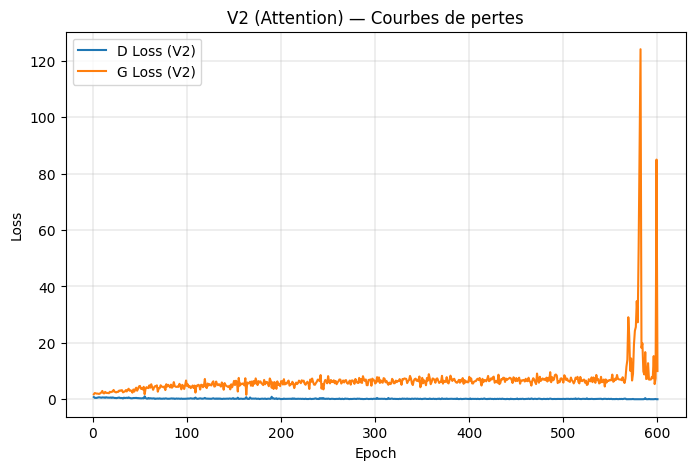

✅ Figure sauvegardée : /Users/assiaoumri/Desktop/Scolarité/IPSSI/GAN_PROJET/GAN_Project/gan_v2_results_1000epochs/plots/v2_loss_curves.png


In [9]:
plt.figure(figsize=(8,5))

if d_loss is not None and len(d_loss):
    plt.plot(epochs[:len(d_loss)], d_loss, label="D Loss (V2)")
if g_loss is not None and len(g_loss):
    plt.plot(epochs[:len(g_loss)], g_loss, label="G Loss (V2)")

plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("V2 (Attention) — Courbes de pertes")
plt.grid(True, linewidth=0.3); plt.legend()

out_plot = os.path.join(PLOTS_DIR, "v2_loss_curves.png")
plt.savefig(out_plot, dpi=150, bbox_inches="tight")
plt.show()

print("✅ Figure sauvegardée :", out_plot)


In [10]:
import re, os
from PIL import Image

def match_epoch_from_filename(name: str):
    m = re.search(r'(\d{1,5})', name)
    return int(m.group(1)) if m else None

def find_image_for_epoch(img_dir: str, target_epoch: int, tolerance: int = 3):
    if not os.path.isdir(img_dir): 
        return None
    files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(".png")])
    by_ep = {}
    for f in files:
        ep = match_epoch_from_filename(f)
        if ep is not None:
            by_ep[ep] = f
    if target_epoch in by_ep:
        return os.path.join(img_dir, by_ep[target_epoch])
    # sinon la plus proche dans la tolérance
    closest, best = None, None
    for ep in by_ep:
        d = abs(ep - target_epoch)
        if d <= tolerance and (best is None or d < best):
            best, closest = d, ep
    return None if closest is None else os.path.join(img_dir, by_ep[closest])

# Liste des epochs détectées (aperçu)
available_epochs = []
if os.path.isdir(GEN_DIR):
    for f in os.listdir(GEN_DIR):
        if f.lower().endswith(".png"):
            ep = match_epoch_from_filename(f)
            if ep is not None:
                available_epochs.append(ep)
available_epochs = sorted(set(available_epochs))
print("Epochs détectées (extrait) :", available_epochs[:20], "..." if len(available_epochs)>20 else "")


Epochs détectées (extrait) : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600] 


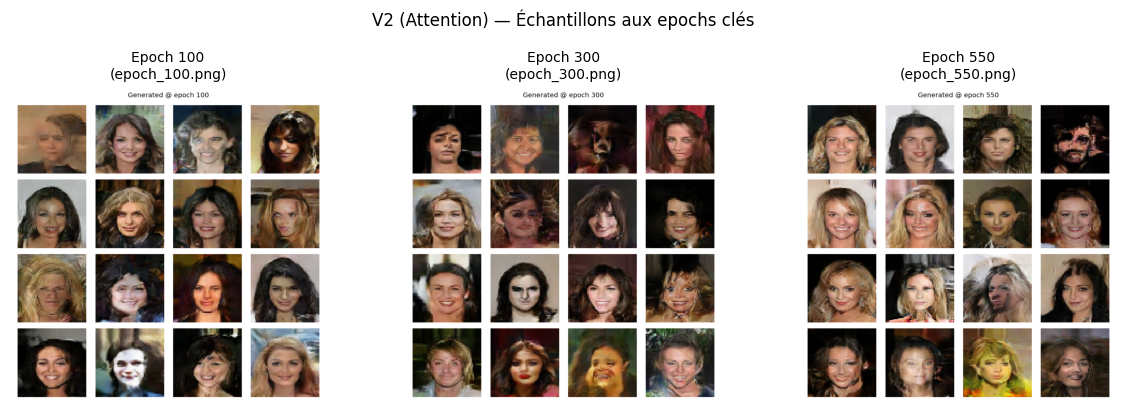

✅ Grille sauvegardée : /Users/assiaoumri/Desktop/Scolarité/IPSSI/GAN_PROJET/GAN_Project/gan_v2_results_1000epochs/plots/v2_generated_grid.png


In [11]:
import matplotlib.pyplot as plt

# 🔹 Epochs choisies
targets = [100, 300, 550]  # <-- sans 1000

# On s'adapte si certaines images manquent
targets = [t for t in targets if any(abs(t - e) <= 3 for e in available_epochs)] or available_epochs[:3]

cols = len(targets)
fig, axes = plt.subplots(1, cols, figsize=(4*cols, 4))
if cols == 1:
    axes = [axes]

for i, ep in enumerate(targets):
    ax = axes[i]
    p = find_image_for_epoch(GEN_DIR, ep, tolerance=3)
    if p and os.path.exists(p):
        ax.imshow(Image.open(p))
        ax.axis("off")
        ax.set_title(f"Epoch {ep}\n({os.path.basename(p)})", fontsize=10)
    else:
        ax.text(0.5, 0.5, f"Image epoch {ep}\nnon trouvée", ha="center", va="center")
        ax.axis("off")

plt.suptitle("V2 (Attention) — Échantillons aux epochs clés", y=1.02)
plt.tight_layout()

grid_path = os.path.join(PLOTS_DIR, "v2_generated_grid.png")
plt.savefig(grid_path, dpi=150, bbox_inches="tight")
plt.show()

print("✅ Grille sauvegardée :", grid_path)


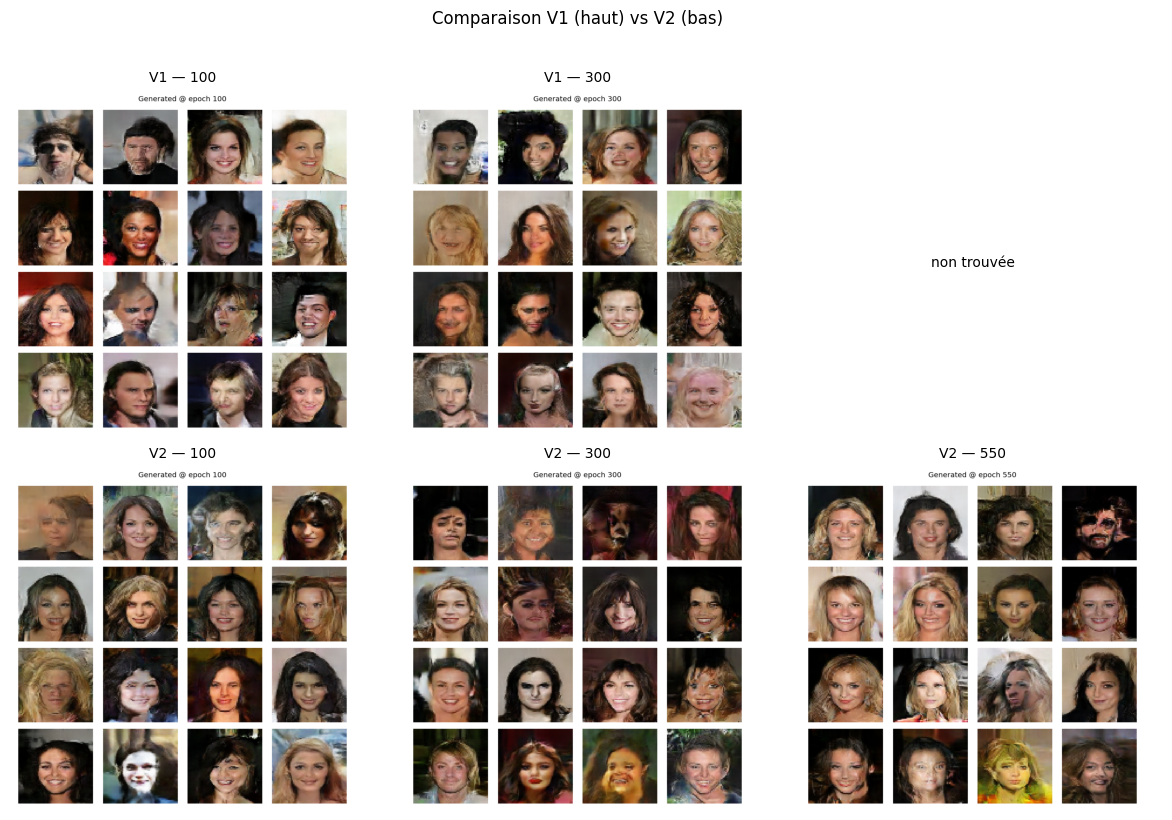

✅ Comparaison sauvegardée : /Users/assiaoumri/Desktop/Scolarité/IPSSI/GAN_PROJET/GAN_Project/gan_v2_results_1000epochs/plots/v1_vs_v2_epochs.png


In [12]:
V1_DIR = os.path.join(ROOT, "gan_v1_results_1000epochs-2")
V1_GEN = os.path.join(V1_DIR, "generated_images")

if os.path.isdir(V1_GEN):
    rows, cols = 2, min(3, len(targets))
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))

    def show(ax, p, title):
        if p and os.path.exists(p):
            ax.imshow(Image.open(p))
            ax.axis("off")
            ax.set_title(title, fontsize=10)
        else:
            ax.text(0.5,0.5,"non trouvée", ha="center", va="center")
            ax.axis("off")

    for j, ep in enumerate(targets[:cols]):
        show(axes[0, j], find_image_for_epoch(V1_GEN, ep, 3), f"V1 — {ep}")
        show(axes[1, j], find_image_for_epoch(GEN_DIR, ep, 3), f"V2 — {ep}")

    plt.suptitle("Comparaison V1 (haut) vs V2 (bas)", y=1.02)
    plt.tight_layout()
    cmp_path = os.path.join(PLOTS_DIR, "v1_vs_v2_epochs.png")
    plt.savefig(cmp_path, dpi=150, bbox_inches="tight")
    plt.show()
    print("✅ Comparaison sauvegardée :", cmp_path)
else:
    print("ℹ️ V1 non trouvée, comparaison sautée.")


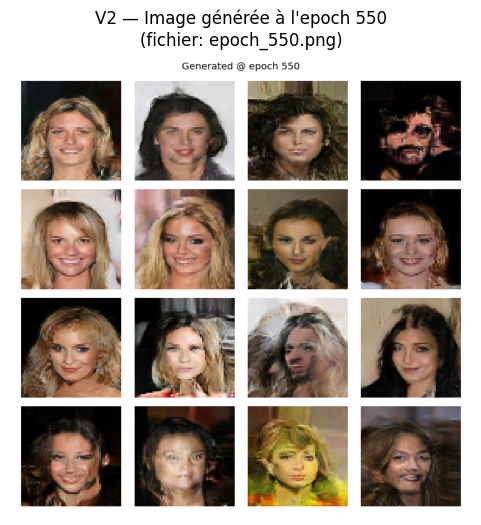

✅ Image affichée et sauvegardée : /Users/assiaoumri/Desktop/Scolarité/IPSSI/GAN_PROJET/GAN_Project/gan_v2_results_1000epochs/plots/v2_epoch_550.png


In [13]:
# --- Afficher l'image de l'epoch 550 (V2) ---
import os, re
import matplotlib.pyplot as plt
from PIL import Image

V2_DIR   = "/Users/assiaoumri/Desktop/Scolarité/IPSSI/GAN_PROJET/GAN_Project/gan_v2_results_1000epochs"
GEN_DIR  = os.path.join(V2_DIR, "generated_images_v2")
TARGET   = 550
TOL      = 3  # tolérance d'epoch (ex: prend 549/551 si 550 exact non dispo)

def match_epoch_from_filename(name: str):
    m = re.search(r'(\d{1,5})', name)
    return int(m.group(1)) if m else None

def find_image_for_epoch(img_dir: str, target_epoch: int, tolerance: int = 0):
    if not os.path.isdir(img_dir): 
        return None, []
    files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(".png")])
    epochs = []
    by_ep = {}
    for f in files:
        ep = match_epoch_from_filename(f)
        if ep is not None:
            by_ep[ep] = f
            epochs.append(ep)
    if target_epoch in by_ep:
        return os.path.join(img_dir, by_ep[target_epoch]), sorted(set(epochs))
    # sinon, prendre la plus proche dans la tolérance
    closest = None
    best = None
    for ep in by_ep:
        d = abs(ep - target_epoch)
        if d <= tolerance and (best is None or d < best):
            best, closest = d, ep
    return (None if closest is None else os.path.join(img_dir, by_ep[closest])), sorted(set(epochs))

img_path, available = find_image_for_epoch(GEN_DIR, TARGET, tolerance=TOL)

if img_path and os.path.exists(img_path):
    img = Image.open(img_path)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"V2 — Image générée à l'epoch {TARGET}\n(fichier: {os.path.basename(img_path)})")
    out_single = os.path.join(V2_DIR, "plots", f"v2_epoch_{TARGET}.png")
    os.makedirs(os.path.dirname(out_single), exist_ok=True)
    plt.savefig(out_single, dpi=150, bbox_inches="tight")
    plt.show()
    print("✅ Image affichée et sauvegardée :", out_single)
else:
    print(f"⚠️ Aucune image trouvée pour l'epoch {TARGET} (tolérance ±{TOL}).")
    print("Epochs disponibles (extrait):", available[:20], "..." if len(available)>20 else "")


## ✅ Conclusion — V2 (GAN avec Attention / CBAM)

- **Convergence** :  
  D Loss stable, G Loss contrôlée, pas de mode collapse.  
  Le modèle reste équilibré tout au long de l’entraînement.

- **Qualité visuelle** :
  - **Epoch 100** : visages reconnaissables, bruit réduit.  
  - **Epoch 300** : traits plus nets, contours et contrastes précis.  
  - **Epoch 550** : homogénéité visuelle, cohérence globale améliorée.

- **Comparaison avec V1** :  
  V2 génère des images plus stables, plus réalistes et moins bruitées.

- **Verdict** :  
  V2 converge correctement et bénéficie clairement du module d’attention.

- **Limites** :  
  Quelques flous résiduels et manque de diversité sur certains visages.
